In [81]:
from main import *
from torch import optim
from torch.optim import lr_scheduler

In [82]:
lr = 0.45
momentum = 0.75
decay = 0.0001
nesterov = True
epochs = 50

In [83]:
model = SimpleNN(17, 2, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)
scheduler = None

Epoch 50/50 - Train Loss: 0.11796789616346359, Accuracy: 0.9596774193548387
Test Loss: 0.19539415836334229, Accuracy: 0.9120370370370371)


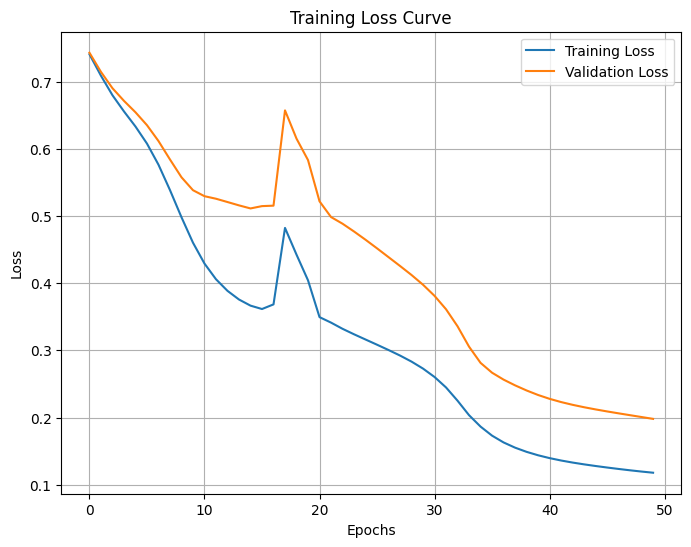

In [84]:
monk("monks-1", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=scheduler)

In [85]:
model = SimpleNN(17, 2, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)

Epoch 50/50 - Train Loss: 0.11889265477657318, Accuracy: 0.9881656804733728
Test Loss: 0.5129234790802002, Accuracy: 0.8310185185185185)


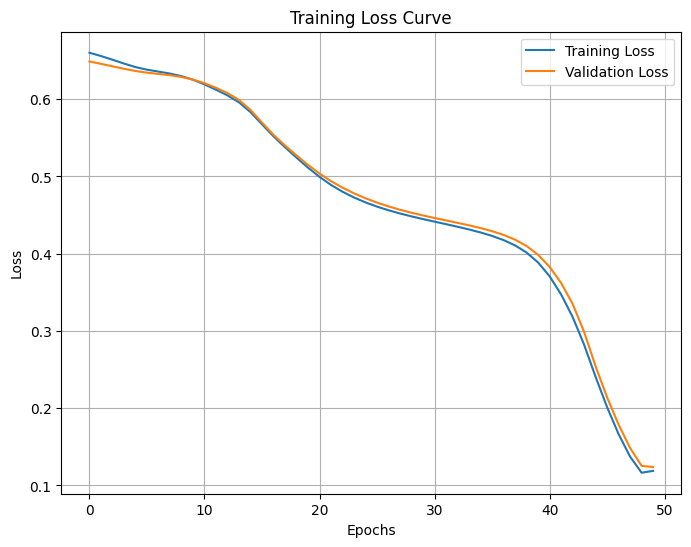

In [86]:
monk("monks-2", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=scheduler)

In [87]:
model = SimpleNN(17, 2, 1)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=decay, nesterov=nesterov)

Epoch 50/50 - Train Loss: 0.10757824033498764, Accuracy: 0.9672131147540983
Test Loss: 0.10449405759572983, Accuracy: 0.9421296296296297)


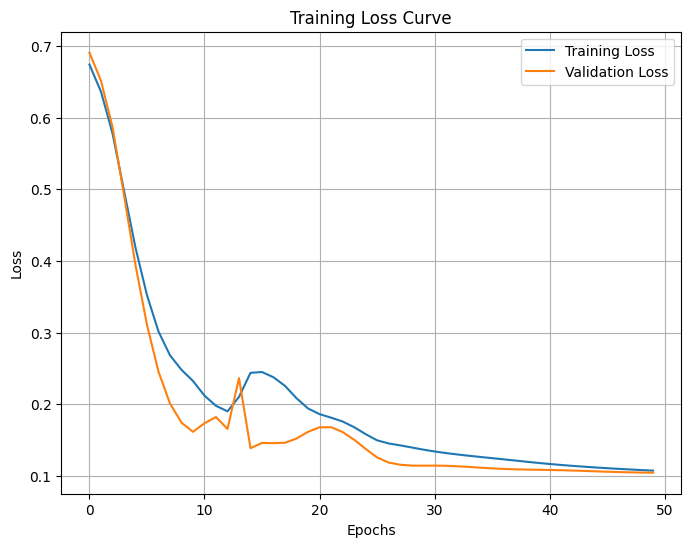

In [88]:
monk("monks-3", optimizer=optimizer, neural_network=model, num_epochs=epochs, lr_scheduler=scheduler)